In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

D:\projecttools\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\projecttools\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\projecttools\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)

Bad key text.latex.unicode in file D:\projecttools\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file D:\projecttools\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplo

In [2]:
np.random.seed(123)

In [3]:
def generate_trian_data(size):
    x_train = np.random.uniform(-1,1,size=(size))
    y_train = x_train*0.3+np.random.normal(0,0.05,(size))
    return x_train,y_train
x_train,y_train = generate_trian_data(200)
x_test,y_test = generate_trian_data(50)

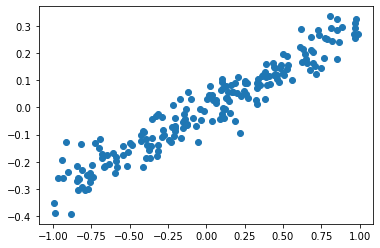

In [4]:
plt.scatter(x_train,y_train)

In [5]:
x_t,x_val,y_t,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [6]:
model = Sequential()
model.add(Dense(1,input_dim=1))
model.compile(loss="mse",optimizer="sgd",metrics=['accuracy'])

In [21]:
hist = model.fit(x_t,y_t,validation_data=(x_val,y_val),epochs=200,verbose=0)

for step in range(200):
    cost = model.train_on_batch(x_t,y_t)
    if step%50==0:
        print(step,cost)

In [22]:
cost = model.evaluate(x_test,y_test)
print(cost)

2/2 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0000e+00
[0.0025932323187589645, 0.0]


In [23]:
w,b = model.layers[0].get_weights()

In [24]:
print(w)

[[0.2969185]]


In [25]:
print(b)

[-0.00294133]


AttributeError: 'Line2D' object has no property 'format_string'

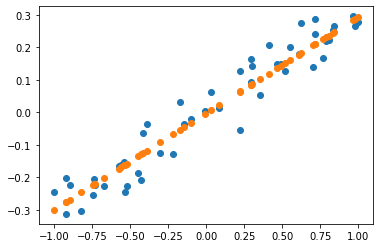

In [28]:
y_pred = model.predict(x_test)
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)
plt.plot(np.linspace(-1,1,10),np.linspace(-1,1,10)*w[0]+b,'')